<a href="https://colab.research.google.com/github/cosmin220304/Numerical-Calculus/blob/main/Lab2_CN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

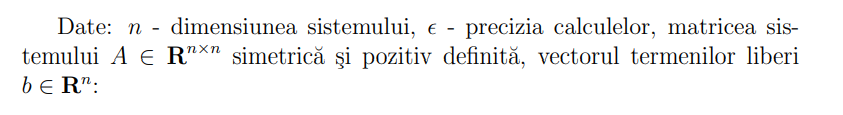

In [143]:
import numpy as np
import math

n = int(input('give n '))
eps = float(input('give epsilon '))
a = np.empty([n, n], float)
b = np.empty([n], float)

if eps > 10**(-5):
  raise Exception(f'Epsilon is too big (bigger than {10**(-5)})')

for i in range(n):
  for j in range(n):
      a[i][j] = a[j][i] = int(input(f'value for {i} {j} ')) 
print(a)

for i in range(n):
      b[i] = float(input(f'value1 for {i} ')) 
print(b)

give n 3
give epsilon 0.00001
value for 0 0 6
value for 0 1 15
value for 0 2 55
value for 1 0 15
value for 1 1 55
value for 1 2 225
value for 2 0 55
value for 2 1 225
value for 2 2 979
[[  6.  15.  55.]
 [ 15.  55. 225.]
 [ 55. 225. 979.]]
value for 0 1
value for 1 2
value for 2 3
[1. 2. 3.]



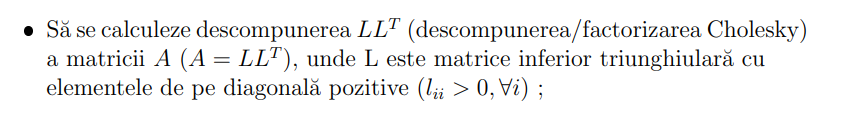

In [155]:
from math import sqrt 
L = np.empty([n, n], float)

try :
  for p in range(n):
    for i in range(p+1):
      sum = 0
      for j in range(i):
        sum += L[p][j] * L[i][j] 
      if (p == i):
          L[p][i] = sqrt(a[p][p] - sum)
      else:
          L[p][i] = (1.0 / L[i][i] * (a[p][i] - sum))
    for i in range(p+1, n):
      L[p][i] = 0
  print(L)
except:
  print('Matrix is not symmetric positive definite matrix')

[[ 2.44948974  0.          0.        ]
 [ 6.12372436  4.18330013  0.        ]
 [22.45365598 20.91650066  6.11010093]]


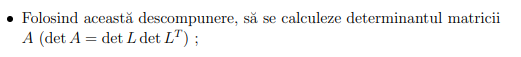

In [145]:
detL = 1
for i in range(n):
  detL *= L[i][i]

detA = detL ** 2
print(detA)

3919.9999999999905


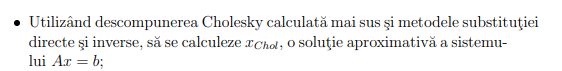

In [146]:
def DirectSubstitution():
  b = [1, 2, 3]
  x = [0]*n
  x[0] = b[0]/a[0][0]

  for i in range(1, n):
    sum = 0
    for j in range(i):
      sum += a[i][j]*x[j]
    x[i] = sum/a[i][i]
  
  return x

def IndirectSubstitution():
  b = [1, 2, 3]
  x = [0]*n
  x[n-1] = b[n-1] / a[n-1][n-1]

  for i in range(n-1, -1, -1):
    sum = 0
    for j in range(i, n): 
      sum += a[i][j]*x[j]
    x[i] = sum/a[i][i]

  return x

print(DirectSubstitution())
print(IndirectSubstitution())

[0.16666666666666666, 0.045454545454545456, 0.019809948308416134]
[0.05942984492524839, 0.012535982913919582, 0.0030643513789581204]


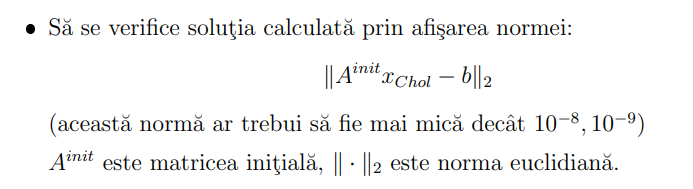

In [154]:
xChol = DirectSubstitution()
diff = np.linalg.norm(np.dot(a, xChol) - b, 2)
print(diff)

xChol = IndirectSubstitution()
diff = np.linalg.norm(np.dot(a, xChol) - b, 2)
print(diff)

realX = [-5/56, 37/80, -11/112] # https://onlinemschool.com/math/assistance/equation/matr/
diff = np.linalg.norm(np.dot(a, realX) - b, 2)
print(diff) 

36.5994591134527
6.101984301769967
4.05801323266554e-15


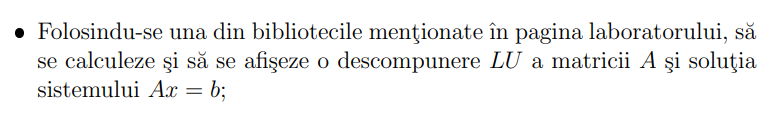

In [153]:
from scipy.linalg import lu
p, l, u = lu(a)
xChol = np.linalg.solve(a, b)

print(l)
print(u)
print(xChol)

[[1.         0.         0.        ]
 [0.10909091 1.         0.        ]
 [0.27272727 0.66666667 1.        ]]
[[ 55.         225.         979.        ]
 [  0.          -9.54545455 -51.8       ]
 [  0.           0.          -7.46666667]]
[-0.08928571  0.4625     -0.09821429]
